In [215]:
# Imports

import  pandas as pd
import os
import numpy as np
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import cohen_kappa_score
# from sklearn.metrics import f1_score
# from sklearn.metrics import precision_score,recall_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgbm
# import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score
# from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve
import seaborn as sns
print("Imported All Imports")

Imported All Imports


In [216]:
train = pd.read_excel('train.xlsx',sheetno=0)
test = pd.read_excel('test.xlsx',sheetno=0)
sample = pd.read_excel('sample.xlsx',sheetno=0)

In [217]:
train.head(50)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
5,BAMS,8 years experience,NaN,"Porur, Chennai",Ayurveda,NaN,100
6,BHMS,42 years experience,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
8,"MBBS, MD - General Medicine",14 years experience,NaN,"Old City, Hyderabad",General Medicine,NaN,100
9,"BSc, BDS",23 years experience,NaN,"Athani, Ernakulam",Dentist,NaN,100


In [218]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [219]:
train.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

### Adding New Features
adding new features like city,locality from Place and extracting years from Experience Column and splitting out the Qualification column. And Collecting feedback count from Miscellaneous_Info column


In [220]:
def getFeedbackCount(value):
    words = value.split()
    if 'Feedback' in words:
        return words[words.index('Feedback') -1 ]
    elif 'feedback' in words:
        return words[words.index('feedback') -1 ]
    else:
        return 0

In [221]:
def addNewFeatures(data):
    data['exp_years'] = data['Experience'].str.slice(stop=2).astype(int)
    data['Rating'].fillna('0%',inplace = True)

    data['City'] = data['Place'].str.split(',').str[1].str.strip()
    data['Locality'] = data['Place'].str.split(',').str[0].str.strip()
#     exclusing Sector 5 Value, as it wont indicate City Name
    data = data[~data['City'].isin(['Sector 5'])]
    
    data['Qualification_1'] = data['Qualification'].str.split(',').str[0]
    data['Qualification_2'] = data['Qualification'].str.split(',').str[1]
    data['Qualification_3'] = data['Qualification'].str.split(',').str[2]
    
    data['Misc Info Exists'] = (~data['Miscellaneous_Info'].isnull())
    data['Misc Info Exists'] = data['Misc Info Exists'].astype(int)
    
    
    data['Miscellaneous_Info'].fillna('none',inplace = True)
    data['feedback'] = data['Miscellaneous_Info'].apply(getFeedbackCount)
    data['feedback'] = data['feedback'].astype(int)
    data['Rating'] = data['Rating'].str.slice(stop=-1).astype(int)
    
    
    
    data.drop(['Miscellaneous_Info','Qualification','Experience','Place'],inplace=True,axis=1)
    return data
    

In [222]:
train = addNewFeatures(train)

C:\Users\503080184\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\503080184\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\503080184\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on

In [223]:
test = addNewFeatures(test)

In [224]:
train.head()

,Rating,Profile,Fees,exp_years,City,Locality,Qualification_1,Qualification_2,Qualification_3,Misc Info Exists,feedback
0,100,Homeopath,100,24,Ernakulam,Kakkanad,BHMS,MD - Homeopathy,NaN,1,16
1,98,Ayurveda,350,12,Bangalore,Whitefield,BAMS,MD - Ayurveda Medicine,NaN,1,76
2,0,ENT Specialist,300,9,Bangalore,Mathikere - BEL,MBBS,MS - Otorhinolaryngology,NaN,0,0
3,0,Ayurveda,250,12,Bangalore,Bannerghatta Road,BSc - Zoology,BAMS,NaN,1,0
4,100,Ayurveda,250,20,Chennai,Keelkattalai,BAMS,NaN,NaN,1,4


In [225]:
test.head()

,Rating,Profile,exp_years,City,Locality,Qualification_1,Qualification_2,Qualification_3,Misc Info Exists,feedback
0,0,General Medicine,35,Mumbai,Ghatkopar East,MBBS,NaN,NaN,0,0
1,0,ENT Specialist,31,Hyderabad,West Marredpally,MBBS,Diploma in Otorhinolaryngology (DLO),NaN,0,0
2,70,Dermatologists,40,Chennai,KK Nagar,MBBS,DDVL,NaN,1,4
3,0,Ayurveda,0,Delhi,New Ashok Nagar,BAMS,NaN,NaN,0,0
4,100,Dentist,16,Bangalore,Kanakpura Road,BDS,MDS - Conservative Dentistry & Endodontics,NaN,1,0


### Detect Missing Values and Handling Missing Values¶

In [226]:
def missing_values_table(df):
	mis_val = df.isnull().sum()
	mis_val_percent = 100 * df.isnull().sum() / len(df)
	mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
	mis_val_table_ren_columns = mis_val_table.rename(columns={0: 'Missing Values', 1: '% of Total Values'})
	mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values('% of Total Values', ascending=False).round(2)
	print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
	return mis_val_table_ren_columns

In [227]:
missing_values_table(train)

Your selected dataframe has 11 columns.
 There are 4 columns that have missing values.


,Missing Values,% of Total Values
Qualification_3,4589,77.00
Qualification_2,1961,32.90
City,26,0.44
Locality,25,0.42


In [228]:
missing_values_table(test)

Your selected dataframe has 10 columns.
 There are 4 columns that have missing values.


,Missing Values,% of Total Values
Qualification_3,1498,75.39
Qualification_2,609,30.65
City,6,0.30
Locality,6,0.30


In [229]:
def handleMissingValues(data):
    values={"Qualification_3":'none',"Qualification_2":"none",'City':'none','Locality':'none'}
    data.fillna(value=values,inplace=True)
    return data

In [230]:
train = handleMissingValues(train)

In [231]:
test = handleMissingValues(test)

In [232]:
train.head()

,Rating,Profile,Fees,exp_years,City,Locality,Qualification_1,Qualification_2,Qualification_3,Misc Info Exists,feedback
0,100,Homeopath,100,24,Ernakulam,Kakkanad,BHMS,MD - Homeopathy,none,1,16
1,98,Ayurveda,350,12,Bangalore,Whitefield,BAMS,MD - Ayurveda Medicine,none,1,76
2,0,ENT Specialist,300,9,Bangalore,Mathikere - BEL,MBBS,MS - Otorhinolaryngology,none,0,0
3,0,Ayurveda,250,12,Bangalore,Bannerghatta Road,BSc - Zoology,BAMS,none,1,0
4,100,Ayurveda,250,20,Chennai,Keelkattalai,BAMS,none,none,1,4


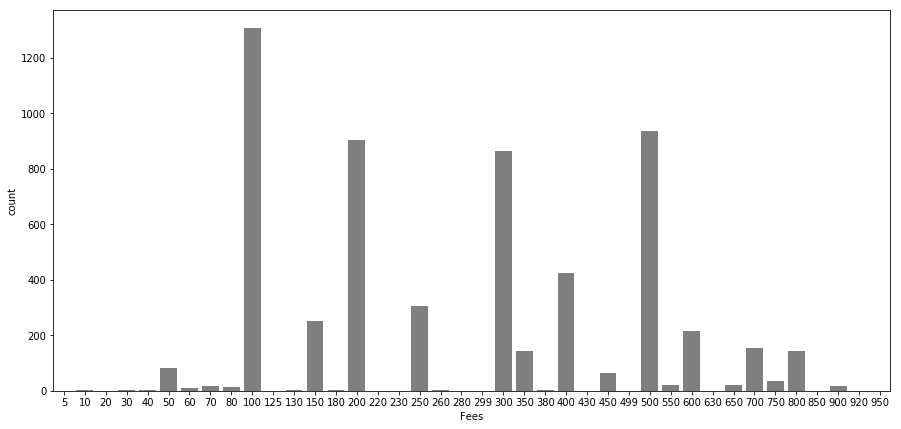

In [233]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(train['Fees'].sort_values(), ax=ax, color='k', alpha=0.5)
plt.show()

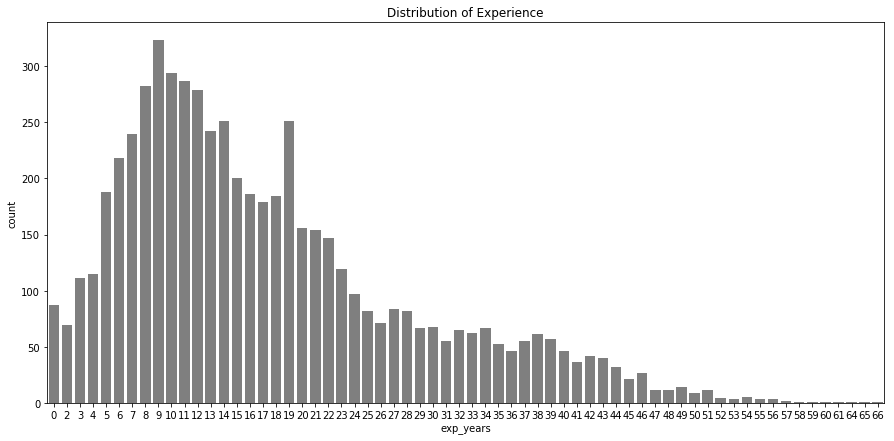

In [234]:
fig, ax = plt.subplots(figsize=(15,7))
sns.countplot(train['exp_years'], ax=ax, color='k', alpha=0.5)
ax.set(title='Distribution of Experience')
plt.show()

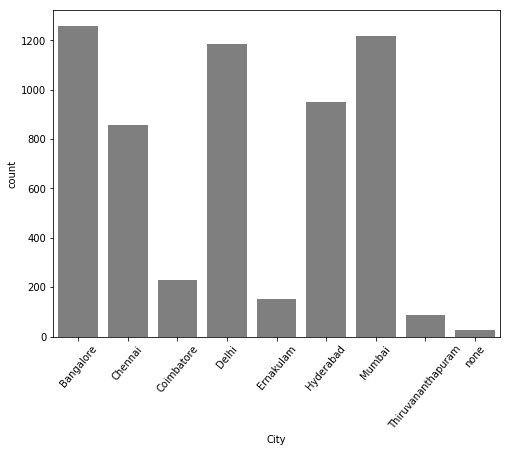

In [235]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(train['City'].sort_values(), ax=ax, color='k', alpha=0.5)
plt.xticks(rotation=50)
plt.show()

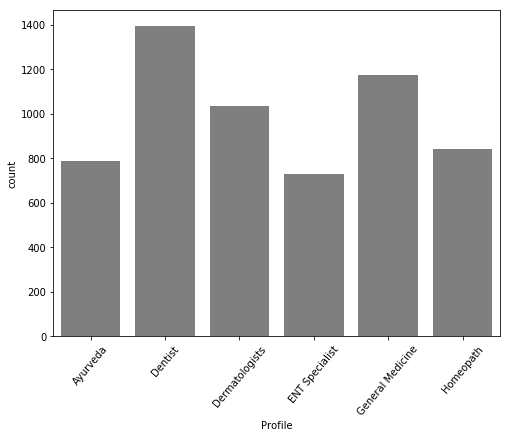

In [236]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(train['Profile'].sort_values(), ax=ax, color='k', alpha=0.5)
plt.xticks(rotation=50)
plt.show()

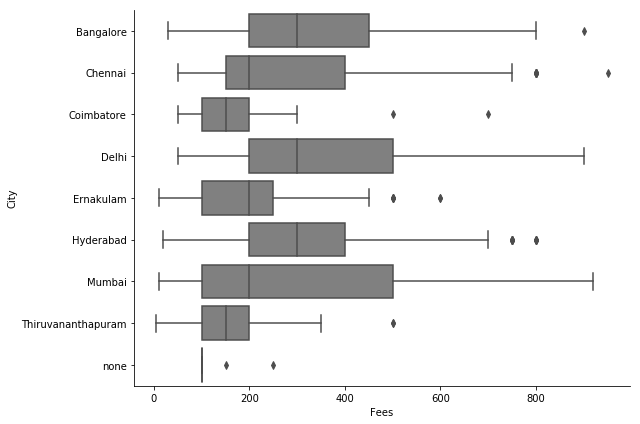

In [237]:
sns.catplot(x='Fees', y='City', data=train.sort_values("City"), kind='box', height=6, aspect= 1.5, color='gray')
plt.show()

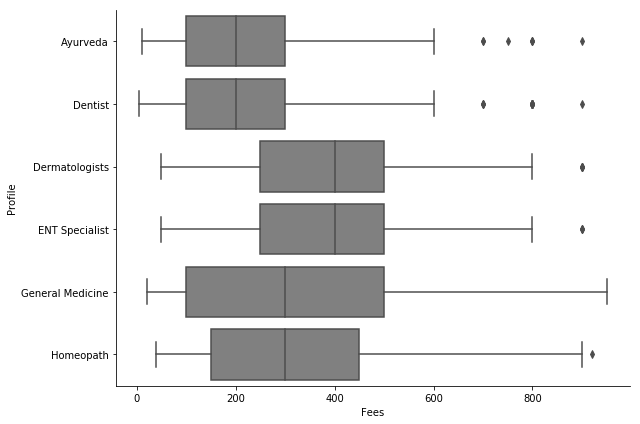

In [238]:
sns.catplot(x='Fees', y='Profile', data=train.sort_values("Profile"), kind='box', height=6, aspect= 1.5, color='gray')
plt.show()

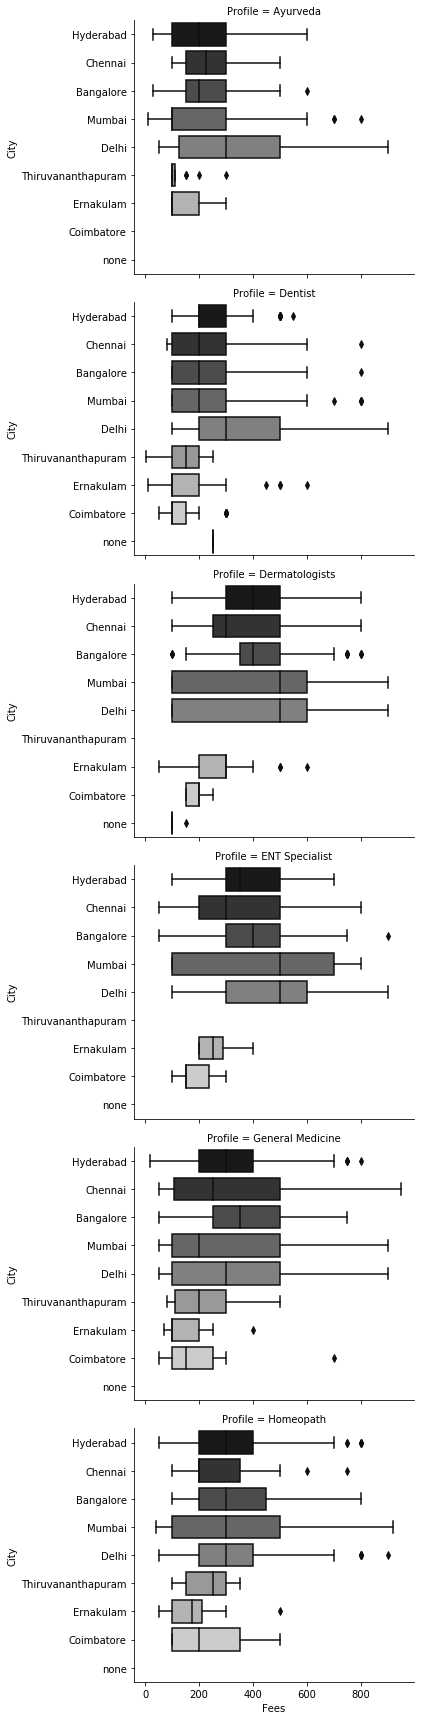

In [239]:
sns.catplot(x='Fees', y='City', row='Profile', data=train.sort_values("Profile"), kind='box', height=4, aspect= 1.5, palette="gray")
plt.show()

#### Label Encoding of the categorical features

In [240]:
# Label Encoding of Variable
def labelEncoding(data,columns):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    for i in columns:
        data[i] = le.fit_transform(data[i])
    return data

In [241]:
train['Profile'].value_counts()

Dentist             1396
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [242]:
train['City'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
none                    26
Name: City, dtype: int64

In [243]:
test['City'].value_counts()

Bangalore             420
Delhi                 417
Mumbai                389
Hyderabad             333
Chennai               287
Coimbatore             70
Ernakulam              48
Thiruvananthapuram     17
none                    6
Name: City, dtype: int64

In [244]:
train = labelEncoding(train,['Profile','City','Locality','Qualification_1','Qualification_2','Qualification_3'])

In [245]:
test = labelEncoding(test,['Profile','City','Locality','Qualification_1','Qualification_2','Qualification_3'])

In [246]:
train.head()

,Rating,Profile,Fees,exp_years,City,Locality,Qualification_1,Qualification_2,Qualification_3,Misc Info Exists,feedback
0,100,5,100,24,4,296,8,252,406,1,16
1,98,0,350,12,0,855,5,241,406,1,76
2,0,3,300,9,0,452,79,334,406,0,0
3,0,0,250,12,0,68,12,7,406,1,0
4,100,0,250,20,1,335,5,426,406,1,4


In [247]:
test.head()

,Rating,Profile,exp_years,City,Locality,Qualification_1,Qualification_2,Qualification_3,Misc Info Exists,feedback
0,0,4,35,6,142,48,243,195,0,0
1,0,3,31,5,577,48,79,195,0,0
2,70,2,40,1,212,48,28,195,1,4
3,0,0,0,3,373,1,243,195,0,0
4,100,1,16,0,231,2,157,195,1,0


In [248]:
X = train.drop(['Fees'],axis=1)
Y = np.array(train['Fees'].tolist())

In [249]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [250]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(X_train, Y_train)
y_test_pred_rf = rf.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test,y_test_pred_rf)))

167.4245020456287


In [251]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)
y_test_pred_lr = lr.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test,y_test_pred_lr)))

175.23416656425425


In [252]:
X_train.dtypes

Rating              int32
Profile             int32
exp_years           int32
City                int32
Locality            int32
Qualification_1     int32
Qualification_2     int32
Qualification_3     int32
Misc Info Exists    int32
feedback            int32
dtype: object

In [253]:
xgb = xgbm.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, n_estimators = 10)
xgb.fit(X_train, Y_train)
y_test_pred_xgb = xgb.predict(X_test)
print(np.sqrt(mean_squared_error(Y_test,y_test_pred_xgb)))

207.90297050475274


In [254]:
import math

#A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

def score(y,y_pred):
    return 1 - rmsle(y,y_pred)


In [255]:
score(Y_test,y_test_pred_rf)

0.39410505877789526

In [256]:
score(Y_test,y_test_pred_xgb)

0.34083232708556643

In [257]:
score(Y_test,y_test_pred_lr)

0.35782537736399744

In [258]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=0.001)
ridge.fit(X_train, Y_train)
y_test_pred_ridge = ridge.predict(X_test)
score(Y_test,y_test_pred_ridge)

0.3578253781102768

In [259]:
lasso = linear_model.Lasso(alpha=0.001)
lasso.fit(X_train, Y_train)
y_test_pred_lasso = lasso.predict(X_test)
score(Y_test,y_test_pred_lasso)

0.35782547182030155